# Session 4: Algorithmic Thinking (with Solutions)

## 1. Steps for solving a complex programming problem

**I.  Describe** in English the task in precise language.

**II. Decompose** the description into well-defined components. For each component, give a step by step recipe of the logic, so that a computer can follow.

**III. Translate** the description of each component into runnable code, and test each component.

**IV. Combine** the code together into one coherent program and test the entire program.

## Case 6: Optimal Pricing

Write a function `optPrice` with two input arguments:

- `priceList`: a list of proposed prices.
- `valueList`: a list of numbers. Each number represents the willingness to pay for the product from a particular customer.

For a given price, the demand is equal to the number of customers with willingness to pay greater than or equal to the price. The function should iterate through the list of prices, and compute the estimated profit for each price, which is equal to the price times the demand. 

The function should return two objects: the first is the best price found. The second object is a dictionary mapping each price to the estimated revenue for that price. See the following code for an example of how one would use the function.

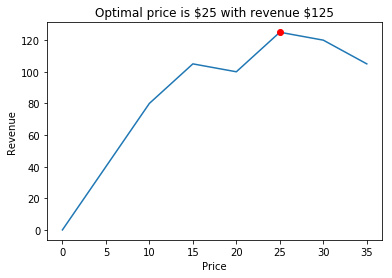

In [6]:
priceList=list(range(0,40,5))
valueList=[32,10,15,18,25,40,50,43]
bestPrice,revenue=optPrice(priceList,valueList)

import matplotlib.pyplot as plt
revenueList=[revenue[price] for price in priceList]
plt.plot(priceList,revenueList)
plt.plot([bestPrice],[revenue[bestPrice]],'ro')
plt.xlabel('Price')
plt.ylabel('Revenue')
plt.title(f'Optimal price is \${bestPrice} with revenue \${revenue[bestPrice]}')
plt.show()

### I. Describe

Estimate the revenue for each given price and find the price with the highest profit.

### II. Decompose

A. Iterate through the prices in the given priceList.

B. Calculate the revenue for a given price: count the number of customer values greater than or equal to the price, and multiply this count with the price. 

C. Store the answer in a dictionary and find the key with the highest value: define a variable to keep track of the best price found so far and another variable for the best profit. When looping through the prices, update the variables appropriately.

D. Package the code into a function called optPrice.

### III. Translate

Write code to implement each component in a separate cell and test each separately. You may supply additional inputs as needed to make the code run.

In [20]:
# A. Iterate through the prices
for price in priceList:
    print(price,end=' ')

0 5 10 15 20 25 30 35 

In [21]:
# B. Count the number of customer values greater than or equal to a given price. 
price=25
count=0
for value in valueList:
    if value>=price:
        count+=1
revenue=count*price
revenue

125

In [18]:
# C. Store the answer in a dictionary and find the key with highest value
results={5:10,10:25,25:125,30:100}
bestRevenue=0
bestPrice=0
for price in results:
    if results[price]>bestRevenue:
        bestRevenue=results[price]
        bestPrice=price
bestRevenue,bestPrice

(125, 25)

In [19]:
# D. Package the code in a function called optPrice
def optPrice(priceList,valueList):
    dic={}
    bestPrice=0
    return bestPrice,dic

optPrice(priceList,valueList)

(0, {})

### IV. Combine
Combine your code from the above steps, but for ease of debugging, do not package the code in the optPrice function yet and print intermediate results.

In [23]:
priceList=[0,5,10,15,20,25,30,35]
valueList=[32,10,15,18,25,40,50,43]
bestPrice=0
bestRevenue=0
results={}
for price in priceList:
    print('Price:',price,end=' ')
    count=0
    for value in valueList:
        if value>=price:
            count+=1
    revenue=count*price
    print('Revenue:', revenue,end=' ')
    results[price]=revenue
    print('Dictionary',results)
    if results[price]>bestRevenue:
        bestRevenue=results[price]
        bestPrice=price
        print('Updated bestPrice:',bestPrice,'bestRevenue:',bestRevenue)
print('Final bestPrice:',bestPrice,'bestRevenue',bestRevenue)

Price: 0 Revenue: 0 Dictionary {0: 0}
Price: 5 Revenue: 40 Dictionary {0: 0, 5: 40}
Updated bestPrice: 5 bestRevenue: 40
Price: 10 Revenue: 80 Dictionary {0: 0, 5: 40, 10: 80}
Updated bestPrice: 10 bestRevenue: 80
Price: 15 Revenue: 105 Dictionary {0: 0, 5: 40, 10: 80, 15: 105}
Updated bestPrice: 15 bestRevenue: 105
Price: 20 Revenue: 100 Dictionary {0: 0, 5: 40, 10: 80, 15: 105, 20: 100}
Price: 25 Revenue: 125 Dictionary {0: 0, 5: 40, 10: 80, 15: 105, 20: 100, 25: 125}
Updated bestPrice: 25 bestRevenue: 125
Price: 30 Revenue: 120 Dictionary {0: 0, 5: 40, 10: 80, 15: 105, 20: 100, 25: 125, 30: 120}
Price: 35 Revenue: 105 Dictionary {0: 0, 5: 40, 10: 80, 15: 105, 20: 100, 25: 125, 30: 120, 35: 105}
Final bestPrice: 25 bestRevenue 125


After you have checked that everything works, remove the intermediate print statements and reorganize the code if needed to make it more readable. Enclose the final code in the optPrice function according to the prompt. 

In [2]:
def demand(price,valueList):
    count=0
    for value in valueList:
        if value>=price:
            count+=1
    return count
def optPrice(priceList,valueList):
    bestRevenue=0
    bestPrice=0
    results={}
    for price in priceList:
        results[price]=demand(price,valueList)*price
        if results[price]>bestRevenue:
            bestRevenue=results[price]
            bestPrice=price
    return bestPrice, results

In [26]:
priceList=[0,5,10,15,20,25,30,35]
values=[32,10,15,18,25,40,50,43]
bestPrice,result=optPrice(priceList,values)
print('Best price:',bestPrice)
print('Profit for each price:',result)

Best price: 25
Profit for each price: {0: 0, 5: 40, 10: 80, 15: 105, 20: 100, 25: 125, 30: 120, 35: 105}


## Case 7. Optimal Wage Contract

Write a function `optimalContract` with two input arguments:

- `hours`: the number of hours you would like to work.
- `contracts`: a dictionary mapping the name of a contract to a list of two numbers. The first number is the hourly rate for the first 40 hours. The second number is the bonus for overtime hours, as a proportion of the hourly rate. 

The function should return two objects. The first is the best possible pay under the specified number of hours worked, and the second is a list of the names of all contracts resulting in the best pay. (If one contract is better than all the rest, then the list has one element. If two or more contracts are tied for the best pay, then the list contains all of the names of the optimal contracts.)

```python
    contracts={'A':[10,.8],'B':[12,0],'C':[12,.1]}
    optimalContract(38,contracts)
```

```
(456, ['B', 'C'])
```

```python
    optimalContract(42,contracts)
```

```
(506.4, ['C'])
```

```python
    optimalContract(60,contracts)
```

```
(760.0, ['A'])
```

### I. Describe 

Go through the given contracts, calculate the pay under each contract for the specified number of hours worked, and return the highest pay and the names of the contracts yielding the highest pay.

### II. Decompose

**A.** Loop through the given contracts.

**B.** Calculate the pay under each contract. The same logic appears in a problem in homework 1.

**C.** Keep track of the set of contracts with the best pay: define a variable to record the best pay found so far, and a list recording all of the contracts found so far with the best pay. When processing a new contract, if the contract has worse pay, then do nothing. If it has equal pay as the best so far, then add it to the list. If it has striclty better pay, then update the best pay so far and make this contract the only element in the list.

### III. Translate 

Translate the description of each component into runnable code, and test each component.

In [9]:
# A. Loop through...
contracts={'A':[10,.5],'B':[12,0],'C':[12,.1]}

for name in contracts:
    base,bonus=contracts[name]
    print(name,'Base:',base,'Bonus:',bonus)

A Base: 10 Bonus: 0.5
B Base: 12 Bonus: 0
C Base: 12 Bonus: 0.1


In [28]:
# B. Calculate the pay ...
hours=43
base=10
bonus=.5
if hours<=40:
    pay=hours*base
else:
    pay=hours*base+(hours-40)*base*bonus
pay

445.0

In [11]:
# C. Keep track ...
bestPay=400
bestContracts=['E','F']
name='A'
pay=445
if pay>bestPay:
    bestPay=pay
    bestContracts=[name]
elif pay==bestPay:
    bestContracts.append(name)
print(bestPay,bestContracts)

445 ['A']


### IV. Combine

Combine the code together into one coherent program and test the entire program. (First code directly in a notebook cell and print intermediate results for ease of debugging.)

In [29]:
hours=38
contracts={'A':[10,.5],'B':[12,0],'C':[12,.1]}
bestPay=0
bestContracts=[]
def calculateWage(hours,base,bonus):
    if hours<=40:
        pay=hours*base
    else:
        pay=hours*base+(hours-40)*base*bonus
    return pay
for name in contracts:
    base,bonus=contracts[name]
    print('Processing contract',name,'Base:',base,'Bonus:',bonus,end=' ')
    pay=calculateWage(hours,base,bonus)
    print('Pay:',pay)
    if pay>bestPay:
        bestPay=pay
        bestContracts=[name]
    elif pay==bestPay:
        bestContracts.append(name)
    print('\tbestPay:',bestPay,'bestContracts:',bestContracts)

Processing contract A Base: 10 Bonus: 0.5 Pay: 380
	bestPay: 380 bestContracts: ['A']
Processing contract B Base: 12 Bonus: 0 Pay: 456
	bestPay: 456 bestContracts: ['B']
Processing contract C Base: 12 Bonus: 0.1 Pay: 456
	bestPay: 456 bestContracts: ['B', 'C']


**Final Solution:**

In [30]:
def calculateWage(hours,base,bonus):
    if hours<=40:
        pay=hours*base
    else:
        pay=hours*base+(hours-40)*base*bonus
    return pay

def optimalContract(hours,contracts):
    bestPay=0
    bestContracts=[]
    for name in contracts:
        base,bonus=contracts[name]
        pay=calculateWage(hours,base,bonus)
        if pay>bestPay:
            bestPay=pay
            bestContracts=[name]
        elif pay==bestPay:
            bestContracts.append(name)
    return bestPay,bestContracts

In [31]:
contracts={'A':[10,.8],'B':[12,0],'C':[12,.1]}
optimalContract(38,contracts)

(456, ['B', 'C'])

In [34]:
optimalContract(42,contracts)

(506.4, ['C'])

In [33]:
optimalContract(60,contracts)

(760.0, ['A'])